In [1]:
import pandas as pd
import glob
import codecs
from pandas import Series, DataFrame
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.optimizers import Adam,RMSprop
from keras.utils import np_utils
from keras import optimizers,regularizers
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#圧力_温度_配管ID.csvの読み込み
data1 = pd.read_csv("drive/My Drive/mdb/test/C50/圧力_温度_配管ID.csv", encoding='shift_jis')

#配管特性.csvの読み込み
data2 = pd.read_csv('drive/My Drive/mdb/test/C50/配管特性.csv',encoding='shift_jis')

#圧力_温度_配管ID.csvのデータの配管IDに合わせて配管特性.csvのデータを結合
data1_frame = DataFrame(data1)
data2_frame = DataFrame(data2)
data12 = pd.merge(data1_frame,data2_frame,how='left',left_on='配管 ID',right_on = '配管ID')

#'To'データの削除
data12 = data12.drop("To",axis=1)
for col_name in data12.columns:
    print(col_name,data12[col_name].dtype)

#結合後のデータ種類
data12
#'配管ID'などの文字データのダミー化
data12_dummy = pd.get_dummies(data12[data12.columns[data12.columns != 'From']])
data12_dummy['From'] = data12['From']
print(data12_dummy['配管 ID_P250S40'])

#Support.csvの読み込み
data_out = pd.read_csv("drive/My Drive/mdb/test/C50/Support.csv",encoding='shift_jis')

#使用したい "Point","Type"データのみにする
for col_name in data_out.columns:
    if col_name != "Point" and col_name != "Type" :
        data_out = data_out.drop(col_name,axis=1)

#重複しているデータの削除
data_out = data_out.drop_duplicates()

#入力データと出力データを'Point'データで結合
data_press_type = pd.merge(data12_dummy,data_out,how = "outer",left_on = 'From',right_on='Point')

#'Support.csv'の'type'データの確認
data_series = Series(data_press_type['Type'])
pd.Series.value_counts(data_series)
#文字データなのでダミー化
data_press_type.at[data_press_type['Type'] == "Guide",'Type'] = 1
data_press_type.at[data_press_type['Type'] == "V - Stop",'Type'] = 2
data_press_type.at[data_press_type['Type'] == "Spr. Hgr",'Type'] = 3
data_press_type.at[data_press_type['Type'] == "Spr. Can",'Type'] = 4
data_test_press = data_press_type.fillna(0)
data_series = Series(data_test_press['Type'])
print(pd.Series.value_counts(data_series))
data_test_press_c50 = data_test_press[data_test_press["呼び径 (mm)_x"] != 0]
data_test_press_c50 = pd.DataFrame(data_test_press_c50)
data_test_press_c50

From object
材質 object
配管 ID object
呼び径 (mm)_x int64
ｹｰｽ 1 圧力 (N/mm2) float64
ｹｰｽ 1 温度 (deg C) int64
ｹｰｽ 1 自動_1 int64
ｹｰｽ 1 線膨張量 (mm/m) float64
ｹｰｽ 1 自動_2 int64
ｹｰｽ 1 運転時弾性係数 (E6 N/mm2) float64
ｹｰｽ 1 自動_3 int64
ｹｰｽ 1 運転時許容応力 (N/mm2) float64
配管ID object
ﾀｸﾞ ﾅﾝﾊﾞｰ object
呼び径 (mm)_y int64
実外径 (mm) float64
ｽｹｼﾞｭｰﾙ object
肉厚 (mm) float64
腐れ代 (mm) int64
製作公差 (mm) float64
保温厚さ (mm) int64
保温材質 object
保温材密度 (kg/m3) float64
外装板厚 (mm) int64
外装板材質 object
外装板密度 (kg/m3) object
ﾗｲﾆﾝｸﾞ厚さ (mm) int64
ﾗｲﾆﾝｸﾞ密度 (kg/m3) object
ﾗｲﾝ ｸﾗｽ object
流体比重 int64
配管材質 object
最低温度の警告 int64
溶接E係数 int64
溶接W係数 自動 object
溶接W係数 object
応力振幅 低減係数 int64
常温時許容応力 (N/mm2) float64
最小降伏点(Sy) (N/mm2) int64
引張強さ(Su) (N/mm2) int64
縦弾性係数 (E6 N/mm2) float64
周方向弾性係数 (E6 N/mm2) float64
せん断弾性係数 (E6 N/mm2) float64
密度 (kg/m3) int64
ﾎﾟｱｿﾝ比 float64
0      1
1      1
2      1
3      1
4      1
      ..
333    0
334    0
335    0
336    0
337    0
Name: 配管 ID_P250S40, Length: 338, dtype: uint8
0    277
1     35
2     17
3     12
4      1
Name: T

,呼び径 (mm)_x,ｹｰｽ 1 圧力 (N/mm2),ｹｰｽ 1 温度 (deg C),ｹｰｽ 1 自動_1,ｹｰｽ 1 線膨張量 (mm/m),ｹｰｽ 1 自動_2,ｹｰｽ 1 運転時弾性係数 (E6 N/mm2),ｹｰｽ 1 自動_3,ｹｰｽ 1 運転時許容応力 (N/mm2),呼び径 (mm)_y,実外径 (mm),肉厚 (mm),腐れ代 (mm),製作公差 (mm),保温厚さ (mm),保温材密度 (kg/m3),外装板厚 (mm),ﾗｲﾆﾝｸﾞ厚さ (mm),流体比重,最低温度の警告,溶接E係数,応力振幅 低減係数,常温時許容応力 (N/mm2),最小降伏点(Sy) (N/mm2),引張強さ(Su) (N/mm2),縦弾性係数 (E6 N/mm2),周方向弾性係数 (E6 N/mm2),せん断弾性係数 (E6 N/mm2),密度 (kg/m3),ﾎﾟｱｿﾝ比,材質_SB410,材質_STPT370-S,配管 ID_E350S40,配管 ID_E400T13,配管 ID_E500T13,配管 ID_P100S40,配管 ID_P125S40,配管 ID_P150S40,配管 ID_P200S40,配管 ID_P250S40,...,配管 ID_P450STD,配管 ID_P450T13,配管 ID_P550STD,配管 ID_P600STD,配管 ID_P600T13,配管 ID_P700STD,配管ID_E350S40,配管ID_E400T13,配管ID_E500T13,配管ID_P100S40,配管ID_P125S40,配管ID_P150S40,配管ID_P200S40,配管ID_P250S40,配管ID_P350S40,配管ID_P450S40,配管ID_P450STD,配管ID_P450T13,配管ID_P550STD,配管ID_P600STD,配管ID_P600T13,配管ID_P700STD,ﾀｸﾞ ﾅﾝﾊﾞｰ_,ｽｹｼﾞｭｰﾙ_40,ｽｹｼﾞｭｰﾙ_NS,ｽｹｼﾞｭｰﾙ_STD,保温材質_Other,外装板材質_,外装板密度 (kg/m3)_,ﾗｲﾆﾝｸﾞ密度 (kg/m3)_,ﾗｲﾝ ｸﾗｽ_BC22,ﾗｲﾝ ｸﾗｽ_BC23,ﾗｲﾝ ｸﾗｽ_BC24,配管材質_SB410,配管材質_STPT370-S,溶接W係数 自動_,溶接W係数_,From,Point,Type
0,250.0,1.77,375.0,1.0,4.750695,1.0,0.17450,1.0,89.00,250.0,267.4,9.3,0.0,1.1625,65.0,201.47,0.0,0.0,0.0,0.0,1.0,1.0,92.0,215.0,370.0,0.202927,0.202927,0.078049,7850.0,0.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,A00,0,0
1,250.0,1.77,375.0,1.0,4.750695,1.0,0.17450,1.0,89.00,250.0,267.4,9.3,0.0,1.1625,65.0,201.47,0.0,0.0,0.0,0.0,1.0,1.0,92.0,215.0,370.0,0.202927,0.202927,0.078049,7850.0,0.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,A01,0,0
2,250.0,1.77,375.0,1.0,4.750695,1.0,0.17450,1.0,89.00,250.0,267.4,9.3,0.0,1.1625,65.0,201.47,0.0,0.0,0.0,0.0,1.0,1.0,92.0,215.0,370.0,0.202927,0.202927,0.078049,7850.0,0.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,A02 N,0,0
3,250.0,1.77,375.0,1.0,4.750695,1.0,0.17450,1.0,89.00,250.0,267.4,9.3,0.0,1.1625,65.0,201.47,0.0,0.0,0.0,0.0,1.0,1.0,92.0,215.0,370.0,0.202927,0.202927,0.078049,7850.0,0.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,A02 F,0,0
4,250.0,1.77,375.0,1.0,4.750695,1.0,0.17450,1.0,89.00,250.0,267.4,9.3,0.0,1.1625,65.0,201.47,0.0,0.0,0.0,0.0,1.0,1.0,92.0,215.0,370.0,0.202927,0.202927,0.078049,7850.0,0.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,A03 N,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,100.0,1.77,375.0,1.0,4.750695,1.0,0.17450,1.0,89.00,100.0,114.3,6.0,0.0,0.7500,65.0,201.53,0.0,0.0,0.0,0.0,1.0,1.0,92.0,215.0,370.0,0.202927,0.202927,0.078049,7850.0,0.3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,I01 F,0,0
334,100.0,1.77,375.0,1.0,4.750695,1.0,0.17450,1.0,89.00,100.0,114.3,6.0,0.0,0.7500,65.0,201.53,0.0,0.0,0.0,0.0,1.0,1.0,92.0,215.0,370.0,0.202927,0.202927,0.078049,7850.0,0.3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,I03,0,0
335,100.0,0.18,362.0,1.0,4.544906,1.0,0.

In [4]:
#圧力_温度_配管ID.csvの読み込み
data1 = pd.read_csv("drive/My Drive/mdb/test/Q10/圧力_温度_配管ID.csv", encoding='shift_jis')

#配管特性.csvの読み込み
data2 = pd.read_csv('drive/My Drive/mdb/test/Q10/配管特性.csv',encoding='shift_jis')

#圧力_温度_配管ID.csvのデータの配管IDに合わせて配管特性.csvのデータを結合
data1_frame = DataFrame(data1)
data2_frame = DataFrame(data2)
data12 = pd.merge(data1_frame,data2_frame,how='left',left_on='配管 ID',right_on = '配管ID')

#'To'データの削除
data12 = data12.drop("To",axis=1)
for col_name in data12.columns:
    print(col_name,data12[col_name].dtype)

#結合後のデータ種類
data12
#'配管ID'などの文字データのダミー化
data12_dummy = pd.get_dummies(data12[data12.columns[data12.columns != 'From']])
data12_dummy['From'] = data12['From']

#Support.csvの読み込み
data_out = pd.read_csv("drive/My Drive/mdb/test/Q10/Support.csv",encoding='shift_jis')

#使用したい "Point","Type"データのみにする
for col_name in data_out.columns:
    if col_name != "Point" and col_name != "Type" :
        data_out = data_out.drop(col_name,axis=1)

#重複しているデータの削除
data_out = data_out.drop_duplicates()

#入力データと出力データを'Point'データで結合
data_press_type = pd.merge(data12_dummy,data_out,how = "outer",left_on = 'From',right_on='Point')

#'Support.csv'の'type'データの確認
data_series = Series(data_press_type['Type'])
pd.Series.value_counts(data_series)

From object
材質 object
配管 ID object
呼び径 (mm)_x int64
ｹｰｽ 1 圧力 (N/mm2) float64
ｹｰｽ 1 温度 (deg C) int64
ｹｰｽ 1 自動_1 int64
ｹｰｽ 1 線膨張量 (mm/m) float64
ｹｰｽ 1 自動_2 int64
ｹｰｽ 1 運転時弾性係数 (E6 N/mm2) float64
ｹｰｽ 1 自動_3 int64
ｹｰｽ 1 運転時許容応力 (N/mm2) int64
配管ID object
ﾀｸﾞ ﾅﾝﾊﾞｰ object
呼び径 (mm)_y int64
実外径 (mm) float64
ｽｹｼﾞｭｰﾙ object
肉厚 (mm) float64
腐れ代 (mm) int64
製作公差 (mm) float64
保温厚さ (mm) int64
保温材質 object
保温材密度 (kg/m3) object
外装板厚 (mm) int64
外装板材質 object
外装板密度 (kg/m3) object
ﾗｲﾆﾝｸﾞ厚さ (mm) int64
ﾗｲﾆﾝｸﾞ密度 (kg/m3) object
ﾗｲﾝ ｸﾗｽ object
流体比重 float64
配管材質 object
最低温度の警告 int64
溶接E係数 int64
溶接W係数 自動 object
溶接W係数 object
応力振幅 低減係数 int64
常温時許容応力 (N/mm2) float64
最小降伏点(Sy) (N/mm2) int64
引張強さ(Su) (N/mm2) int64
縦弾性係数 (E6 N/mm2) float64
周方向弾性係数 (E6 N/mm2) float64
せん断弾性係数 (E6 N/mm2) float64
密度 (kg/m3) int64
ﾎﾟｱｿﾝ比 float64


Guide       33
V - Stop    13
Name: Type, dtype: int64

In [5]:
#文字データなのでダミー化
data_press_type.at[data_press_type['Type'] == "Guide",'Type'] = 1
data_press_type.at[data_press_type['Type'] == "V - Stop",'Type'] = 2
data_test_press = data_press_type.fillna(0)
data_series = Series(data_test_press['Type'])
print(pd.Series.value_counts(data_series))
data_test_press_q10 = data_test_press[data_test_press["呼び径 (mm)_x"] != 0]
data_test_press_q10 = pd.DataFrame(data_test_press_q10)
data_test_press_q10

0    219
1     33
2     13
Name: Type, dtype: int64


,呼び径 (mm)_x,ｹｰｽ 1 圧力 (N/mm2),ｹｰｽ 1 温度 (deg C),ｹｰｽ 1 自動_1,ｹｰｽ 1 線膨張量 (mm/m),ｹｰｽ 1 自動_2,ｹｰｽ 1 運転時弾性係数 (E6 N/mm2),ｹｰｽ 1 自動_3,ｹｰｽ 1 運転時許容応力 (N/mm2),呼び径 (mm)_y,実外径 (mm),肉厚 (mm),腐れ代 (mm),製作公差 (mm),保温厚さ (mm),外装板厚 (mm),ﾗｲﾆﾝｸﾞ厚さ (mm),流体比重,最低温度の警告,溶接E係数,応力振幅 低減係数,常温時許容応力 (N/mm2),最小降伏点(Sy) (N/mm2),引張強さ(Su) (N/mm2),縦弾性係数 (E6 N/mm2),周方向弾性係数 (E6 N/mm2),せん断弾性係数 (E6 N/mm2),密度 (kg/m3),ﾎﾟｱｿﾝ比,材質_SGP-B,材質_SGP-E,材質_STPG370-S,材質_STPT370-S,配管 ID_P100S40,配管 ID_P100SGPB,配管 ID_P150SGPE,配管 ID_P200SGPE,配管 ID_P50S40,配管ID_P100S40,配管ID_P100SGPB,配管ID_P150SGPE,配管ID_P200SGPE,配管ID_P50S40,ﾀｸﾞ ﾅﾝﾊﾞｰ_,ｽｹｼﾞｭｰﾙ_40,ｽｹｼﾞｭｰﾙ_SGP,保温材質_,保温材密度 (kg/m3)_,外装板材質_,外装板密度 (kg/m3)_,ﾗｲﾆﾝｸﾞ密度 (kg/m3)_,ﾗｲﾝ ｸﾗｽ_,配管材質_SGP-B,配管材質_SGP-E,配管材質_STPG370-S,配管材質_STPT370-S,溶接W係数 自動_,溶接W係数_,From,Point,Type
0,150,0.1,100,1,0.91,1,0.19,1,62,150,165.2,5.0,0,0.62,0,0,0,1.00,0,1,1,62.00,147,290,0.2,0.2,0.07,7850,0.3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,1,1,1,1,1,0,1,0,0,1,1,A00,0,0
1,150,0.1,100,1,0.91,1,0.19,1,62,150,165.2,5.0,0,0.62,0,0,0,1.00,0,1,1,62.00,147,290,0.2,0.2,0.07,7850,0.3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,1,1,1,1,1,0,1,0,0,1,1,A01 N,0,0
2,150,0.1,100,1,0.91,1,0.19,1,62,150,165.2,5.0,0,0.62,0,0,0,1.00,0,1,1,62.00,147,290,0.2,0.2,0.07,7850,0.3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,1,1,1,1,1,0,1,0,0,1,1,A01 F,0,0
3,150,0.1,100,1,0.91,1,0.19,1,62,150,165.2,5.0,0,0.62,0,0,0,1.00,0,1,1,62.00,147,290,0.2,0.2,0.07,7850,0.3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,1,1,1,1,1,0,1,0,0,1,1,A02,A02,1
4,150,0.1,100,1,0.91,1,0.19,1,62,150,165.2,5.0,0,0.62,0,0,0,1.00,0,1,1,62.00,147,290,0.2,0.2,0.07,7850,0.3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,1,1,1,1,1,0,1,0,0,1,1,A03 N,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,50,0.1,100,1,0.91,1,0.19,1,106,50,60.5,3.9,0,0.48,0,0,0,0.99,0,1,1,91.99,215,370,0.2,0.2,0.07,7850,0.3,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,Q05 N,0,0
261,50,0.1,100,1,0.91,1,0.19,1,106,50,60.5,3.9,0,0.48,0,0,0,0.99,0,1,1,91.99,215,370,0.2,0.2,0.07,7850,0.3,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,Q05 F,0,0
262,50,0.1,100,1,0.91,1,0.19,1,106,50,60.5,3.9,0,0.48,0,0,0,0.99,0,1,1,91.99,215,370,0.2,0.2,0.07,7850,0.3,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,Q06 N,0,0
263,50,0.1,100,1,0.91,1,0.19,1,106,50,60.5,3.9,0,0.48,0,0,0,0.99,0,1,1,91.99,215,370,0.2,0.2,0.07,7850,0.3,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,Q06 F,0,0


In [6]:
data_test = pd.concat([data_test_press_c50,data_test_press_q10])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
data_test

,From,Point,Type,せん断弾性係数 (E6 N/mm2),保温厚さ (mm),保温材密度 (kg/m3),保温材密度 (kg/m3)_,保温材質_,保温材質_Other,周方向弾性係数 (E6 N/mm2),呼び径 (mm)_x,呼び径 (mm)_y,外装板厚 (mm),外装板密度 (kg/m3)_,外装板材質_,実外径 (mm),密度 (kg/m3),常温時許容応力 (N/mm2),引張強さ(Su) (N/mm2),応力振幅 低減係数,最低温度の警告,最小降伏点(Sy) (N/mm2),材質_SB410,材質_SGP-B,材質_SGP-E,材質_STPG370-S,材質_STPT370-S,流体比重,溶接E係数,溶接W係数 自動_,溶接W係数_,縦弾性係数 (E6 N/mm2),肉厚 (mm),腐れ代 (mm),製作公差 (mm),配管 ID_E350S40,配管 ID_E400T13,配管 ID_E500T13,配管 ID_P100S40,配管 ID_P100SGPB,...,配管ID_P125S40,配管ID_P150S40,配管ID_P150SGPE,配管ID_P200S40,配管ID_P200SGPE,配管ID_P250S40,配管ID_P350S40,配管ID_P450S40,配管ID_P450STD,配管ID_P450T13,配管ID_P50S40,配管ID_P550STD,配管ID_P600STD,配管ID_P600T13,配管ID_P700STD,配管材質_SB410,配管材質_SGP-B,配管材質_SGP-E,配管材質_STPG370-S,配管材質_STPT370-S,ｹｰｽ 1 圧力 (N/mm2),ｹｰｽ 1 温度 (deg C),ｹｰｽ 1 線膨張量 (mm/m),ｹｰｽ 1 自動_1,ｹｰｽ 1 自動_2,ｹｰｽ 1 自動_3,ｹｰｽ 1 運転時弾性係数 (E6 N/mm2),ｹｰｽ 1 運転時許容応力 (N/mm2),ｽｹｼﾞｭｰﾙ_40,ｽｹｼﾞｭｰﾙ_NS,ｽｹｼﾞｭｰﾙ_SGP,ｽｹｼﾞｭｰﾙ_STD,ﾀｸﾞ ﾅﾝﾊﾞｰ_,ﾎﾟｱｿﾝ比,ﾗｲﾆﾝｸﾞ厚さ (mm),ﾗｲﾆﾝｸﾞ密度 (kg/m3)_,ﾗｲﾝ ｸﾗｽ_,ﾗｲﾝ ｸﾗｽ_BC22,ﾗｲﾝ ｸﾗｽ_BC23,ﾗｲﾝ ｸﾗｽ_BC24
0,A00,0,0,0.078049,65.0,201.47,NaN,NaN,1.0,0.202927,250.0,250.0,0.0,1.0,1.0,267.4,7850.0,92.00,370.0,1.0,0.0,215.0,0.0,NaN,NaN,NaN,1.0,0.00,1.0,1.0,1.0,0.202927,9.3,0.0,1.1625,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,1.77,375.0,4.750695,1.0,1.0,1.0,0.1745,89.0,1.0,0.0,NaN,0.0,1.0,0.3,0.0,1.0,NaN,1.0,0.0,0.0
1,A01,0,0,0.078049,65.0,201.47,NaN,NaN,1.0,0.202927,250.0,250.0,0.0,1.0,1.0,267.4,7850.0,92.00,370.0,1.0,0.0,215.0,0.0,NaN,NaN,NaN,1.0,0.00,1.0,1.0,1.0,0.202927,9.3,0.0,1.1625,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,1.77,375.0,4.750695,1.0,1.0,1.0,0.1745,89.0,1.0,0.0,NaN,0.0,1.0,0.3,0.0,1.0,NaN,1.0,0.0,0.0
2,A02 N,0,0,0.078049,65.0,201.47,NaN,NaN,1.0,0.202927,250.0,250.0,0.0,1.0,1.0,267.4,7850.0,92.00,370.0,1.0,0.0,215.0,0.0,NaN,NaN,NaN,1.0,0.00,1.0,1.0,1.0,0.202927,9.3,0.0,1.1625,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,1.77,375.0,4.750695,1.0,1.0,1.0,0.1745,89.0,1.0,0.0,NaN,0.0,1.0,0.3,0.0,1.0,NaN,1.0,0.0,0.0
3,A02 F,0,0,0.078049,65.0,201.47,NaN,NaN,1.0,0.202927,250.0,250.0,0.0,1.0,1.0,267.4,7850.0,92.00,370.0,1.0,0.0,215.0,0.0,NaN,NaN,NaN,1.0,0.00,1.0,1.0,1.0,0.202927,9.3,0.0,1.1625,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,1.77,375.0,4.750695,1.0,1.0,1.0,0.1745,89.0,1.0,0.0,NaN,0.0,1.0,0.3,0.0,1.0,NaN,1.0,0.0,0.0
4,A03 N,0,0,0.078049,65.0,201.47,NaN,NaN,1.0,0.202927,250.0,250.0,0.0,1.0,1.0,267.4,7850.0,92.00,370.0,1.0,0.0,215.0,0.0,NaN,NaN,NaN,1.0,0.00,1.0,1.0,1.0,0.202927,9.3,0.0,1.1625,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,1.77,375.0,4.750695,1.0,1.0,1.0,0.1745,89.0,1.0,0.0,NaN,0.0,1.0,0.3,0.0,1.0,NaN,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Q05 N,0,0,0.070000,0.0,NaN,1.0,1.0,NaN,0.200000,50.0,50.0,0.0,1.0,1.0,60.5,7850.0,91.99,370.0,1.0,0.0,215.0,NaN,0.0,0.0,0.0,1.0,0.99,1.0,1.0,1.0,0.200000,3.9,0.0,0.4800,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.10,100.0,0.910000,1.0,1.0,1.0,0.1900,106.0,1.0,NaN,0.0,NaN,1.0,0.3,0.0,1.0,1.0,NaN,NaN,NaN
261,Q05 F,0,0,0.070000,0.0,NaN,1.0,1.0,NaN,0.200000,50.0,50.0,0.0,1.0,1.0,60.5,7850.0,91.99,370.0,1.0,0.0,215.0,NaN,0.0,0.0,0.0,1.0,0.99,1.0,1.0,1.0,0.200000,3.9,0.0,0.4800,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.10,100.0,0.910000,1.0,1.0,1.0,0.1900,106.0,1.0,NaN,0.0,NaN,1.0,0.3,0.0,1.0,1.0,NaN,NaN,NaN
262,Q06 N,0,0,0.070000,0.0,NaN,1.0,1.0,NaN,0.200000,50.0,50.0,0.0,1.0,1.0,60.

In [8]:
data_test = data_test.fillna(0)
data_test

,From,Point,Type,せん断弾性係数 (E6 N/mm2),保温厚さ (mm),保温材密度 (kg/m3),保温材密度 (kg/m3)_,保温材質_,保温材質_Other,周方向弾性係数 (E6 N/mm2),呼び径 (mm)_x,呼び径 (mm)_y,外装板厚 (mm),外装板密度 (kg/m3)_,外装板材質_,実外径 (mm),密度 (kg/m3),常温時許容応力 (N/mm2),引張強さ(Su) (N/mm2),応力振幅 低減係数,最低温度の警告,最小降伏点(Sy) (N/mm2),材質_SB410,材質_SGP-B,材質_SGP-E,材質_STPG370-S,材質_STPT370-S,流体比重,溶接E係数,溶接W係数 自動_,溶接W係数_,縦弾性係数 (E6 N/mm2),肉厚 (mm),腐れ代 (mm),製作公差 (mm),配管 ID_E350S40,配管 ID_E400T13,配管 ID_E500T13,配管 ID_P100S40,配管 ID_P100SGPB,...,配管ID_P125S40,配管ID_P150S40,配管ID_P150SGPE,配管ID_P200S40,配管ID_P200SGPE,配管ID_P250S40,配管ID_P350S40,配管ID_P450S40,配管ID_P450STD,配管ID_P450T13,配管ID_P50S40,配管ID_P550STD,配管ID_P600STD,配管ID_P600T13,配管ID_P700STD,配管材質_SB410,配管材質_SGP-B,配管材質_SGP-E,配管材質_STPG370-S,配管材質_STPT370-S,ｹｰｽ 1 圧力 (N/mm2),ｹｰｽ 1 温度 (deg C),ｹｰｽ 1 線膨張量 (mm/m),ｹｰｽ 1 自動_1,ｹｰｽ 1 自動_2,ｹｰｽ 1 自動_3,ｹｰｽ 1 運転時弾性係数 (E6 N/mm2),ｹｰｽ 1 運転時許容応力 (N/mm2),ｽｹｼﾞｭｰﾙ_40,ｽｹｼﾞｭｰﾙ_NS,ｽｹｼﾞｭｰﾙ_SGP,ｽｹｼﾞｭｰﾙ_STD,ﾀｸﾞ ﾅﾝﾊﾞｰ_,ﾎﾟｱｿﾝ比,ﾗｲﾆﾝｸﾞ厚さ (mm),ﾗｲﾆﾝｸﾞ密度 (kg/m3)_,ﾗｲﾝ ｸﾗｽ_,ﾗｲﾝ ｸﾗｽ_BC22,ﾗｲﾝ ｸﾗｽ_BC23,ﾗｲﾝ ｸﾗｽ_BC24
0,A00,0,0,0.078049,65.0,201.47,0.0,0.0,1.0,0.202927,250.0,250.0,0.0,1.0,1.0,267.4,7850.0,92.00,370.0,1.0,0.0,215.0,0.0,0.0,0.0,0.0,1.0,0.00,1.0,1.0,1.0,0.202927,9.3,0.0,1.1625,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.77,375.0,4.750695,1.0,1.0,1.0,0.1745,89.0,1.0,0.0,0.0,0.0,1.0,0.3,0.0,1.0,0.0,1.0,0.0,0.0
1,A01,0,0,0.078049,65.0,201.47,0.0,0.0,1.0,0.202927,250.0,250.0,0.0,1.0,1.0,267.4,7850.0,92.00,370.0,1.0,0.0,215.0,0.0,0.0,0.0,0.0,1.0,0.00,1.0,1.0,1.0,0.202927,9.3,0.0,1.1625,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.77,375.0,4.750695,1.0,1.0,1.0,0.1745,89.0,1.0,0.0,0.0,0.0,1.0,0.3,0.0,1.0,0.0,1.0,0.0,0.0
2,A02 N,0,0,0.078049,65.0,201.47,0.0,0.0,1.0,0.202927,250.0,250.0,0.0,1.0,1.0,267.4,7850.0,92.00,370.0,1.0,0.0,215.0,0.0,0.0,0.0,0.0,1.0,0.00,1.0,1.0,1.0,0.202927,9.3,0.0,1.1625,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.77,375.0,4.750695,1.0,1.0,1.0,0.1745,89.0,1.0,0.0,0.0,0.0,1.0,0.3,0.0,1.0,0.0,1.0,0.0,0.0
3,A02 F,0,0,0.078049,65.0,201.47,0.0,0.0,1.0,0.202927,250.0,250.0,0.0,1.0,1.0,267.4,7850.0,92.00,370.0,1.0,0.0,215.0,0.0,0.0,0.0,0.0,1.0,0.00,1.0,1.0,1.0,0.202927,9.3,0.0,1.1625,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.77,375.0,4.750695,1.0,1.0,1.0,0.1745,89.0,1.0,0.0,0.0,0.0,1.0,0.3,0.0,1.0,0.0,1.0,0.0,0.0
4,A03 N,0,0,0.078049,65.0,201.47,0.0,0.0,1.0,0.202927,250.0,250.0,0.0,1.0,1.0,267.4,7850.0,92.00,370.0,1.0,0.0,215.0,0.0,0.0,0.0,0.0,1.0,0.00,1.0,1.0,1.0,0.202927,9.3,0.0,1.1625,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.77,375.0,4.750695,1.0,1.0,1.0,0.1745,89.0,1.0,0.0,0.0,0.0,1.0,0.3,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Q05 N,0,0,0.070000,0.0,0.00,1.0,1.0,0.0,0.200000,50.0,50.0,0.0,1.0,1.0,60.5,7850.0,91.99,370.0,1.0,0.0,215.0,0.0,0.0,0.0,0.0,1.0,0.99,1.0,1.0,1.0,0.200000,3.9,0.0,0.4800,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.10,100.0,0.910000,1.0,1.0,1.0,0.1900,106.0,1.0,0.0,0.0,0.0,1.0,0.3,0.0,1.0,1.0,0.0,0.0,0.0
261,Q05 F,0,0,0.070000,0.0,0.00,1.0,1.0,0.0,0.200000,50.0,50.0,0.0,1.0,1.0,60.5,7850.0,91.99,370.0,1.0,0.0,215.0,0.0,0.0,0.0,0.0,1.0,0.99,1.0,1.0,1.0,0.200000,3.9,0.0,0.4800,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.10,100.0,0.910000,1.0,1.0,1.0,0.1900,106.0,1.0,0.0,0.0,0.0,1.0,0.3,0.0,1.0,1.0,0.0,0.0,0.0
262,Q06 N,0,0,0.070000,0.0,0.00,1.0,1.0,0.0,0.200000,50.0,50.0,0.0,1.0,1.0,

In [9]:
np.random.seed(0) # 乱数を固定値で初期化し再現性を持たせる
X = data_test.drop(['From','Point','Type'],axis=1)
T = data_test['Type']
(n_samples,n_features)=X.shape
n_classes=len(np.unique(T))

print(n_features)

T = np_utils.to_categorical(T) # 数値を、位置に変換 [0,1,2] ==> [ [1,0,0],[0,1,0],[0,0,1] ]
train_x, test_x, train_t, test_t = train_test_split(X, T, train_size=0.7, test_size=0.3)

97


In [10]:
#モデル作成

model = Sequential()
model.add(Dense(100,activation="relu",input_shape=(n_features,)))
model.add(Dropout(0.1))
model.add(Dense(50,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(100,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=n_classes,activation="softmax"))

model.summary()
model.compile(loss='mean_squared_error', optimizer=Adam(),metrics=["accuracy"])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               9800      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               5100      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_

In [11]:
#トレーニング

history=model.fit(X,T,epochs=600,batch_size=100,verbose=1,validation_data=(test_x,test_t))
result=model.predict_classes(X,verbose=0)





Train on 603 samples, validate on 181 samples
Epoch 1/600





603/603 [==============================] - 10s 16ms/step - loss: 0.3857 - acc: 0.0348 - val_loss: 0.4000 - val_acc: 0.0000e+00
Epoch 2/600
603/603 [==============================] - 0s 50us/step - loss: 0.2220 - acc: 0.4444 - val_loss: 0.0685 - val_acc: 0.8287
Epoch 3/600
603/603 [==============================] - 0s 55us/step - loss: 0.0799 - acc: 0.7993 - val_loss: 0.0685 - val_acc: 0.8287
Epoch 4/600
603/603 [==============================] - 0s 51us/step - loss: 0.0716 - acc: 0.8209 - val_loss: 0.0685 - val_acc: 0.8287
Epoch 5/600
603/603 [==============================] - 0s 50us/step - loss: 0.0710 - acc: 0.8226 - val_loss: 0.0685 - val_acc: 0.8287
Epoch 6/600
603/603 [==============================] - 0s 50us/step - loss: 0.0710 - acc: 0.8226 - val_loss: 0.0685 - val_acc: 0.8287
Epoch 7/600
603/603 [==============================] - 0s 53us/step - loss: 0.0710 - acc: 0.8226 - val_loss: 0.0685 - val_acc: 0.8287
Epo

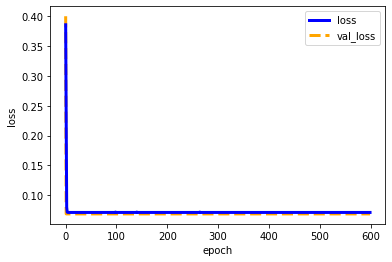

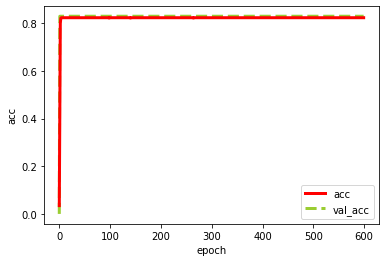

In [12]:
#以下で損失関数のグラフを描画
val_loss,=plt.plot(history.history["val_loss"],c="orange",ls="--",linewidth=3)
loss,=plt.plot(history.history["loss"],c="blue",linewidth=3)
plt.legend([loss,val_loss],["loss","val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
#accuracyをグラフ化
val_acc,=plt.plot(history.history["val_acc"],c="yellowgreen",ls="--",linewidth=3)
acc,=plt.plot(history.history["acc"],c="red",linewidth=3)
plt.legend([acc,val_acc],["acc","val_acc"])
plt.xlabel("epoch")
plt.ylabel("acc")
plt.show()

In [0]:
#データの分類
from sklearn.model_selection import train_test_split
#決定木
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#説明変数と目的変数
X = data_test_press.drop(['From','Point','Type'],axis=1)
Y = data_test_press['Type']

#データを分ける
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 100)

#決定木インスタンス（エントロピー、深さ5）
tree_model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state = 100)

#fitting
tree_model.fit(X_train,Y_train)

#結果
print("train:",tree_model.__class__.__name__,tree_model.score(X_train,Y_train))
print("test:",tree_model.__class__.__name__ , tree_model.score(X_test,Y_test))

train: DecisionTreeClassifier 0.8443396226415094
test: DecisionTreeClassifier 0.7547169811320755


In [0]:
np.random.seed(0) # 乱数を固定値で初期化し再現性を持たせる
X = data_test_press_q10.drop(['From','Point','Type'],axis=1)
T = data_test_press_q10['Type']
(n_samples,n_features)=X.shape
n_classes=len(np.unique(T))

print(n_features)

T = np_utils.to_categorical(T) # 数値を、位置に変換 [0,1,2] ==> [ [1,0,0],[0,1,0],[0,0,1] ]
train_x, test_x, train_t, test_t = train_test_split(X, T, train_size=0.7, test_size=0.3)

58


In [0]:
#トレーニング

history=model.fit(X,T,epochs=600,batch_size=100,verbose=1,validation_data=(test_x,test_t))
result=model.predict_classes(X,verbose=0)




Train on 265 samples, validate on 80 samples
Epoch 1/600





265/265 [==============================] - 10s 37ms/step - loss: 0.6038 - acc: 0.0943 - val_loss: 0.6250 - val_acc: 0.0625
Epoch 2/600
265/265 [==============================] - 0s 56us/step - loss: 0.5987 - acc: 0.1019 - val_loss: 0.6250 - val_acc: 0.0625
Epoch 3/600
265/265 [==============================] - 0s 63us/step - loss: 0.6012 - acc: 0.0981 - val_loss: 0.6250 - val_acc: 0.0625
Epoch 4/600
265/265 [==============================] - 0s 54us/step - loss: 0.5789 - acc: 0.1321 - val_loss: 0.6250 - val_acc: 0.0625
Epoch 5/600
265/265 [==============================] - 0s 57us/step - loss: 0.5157 - acc: 0.2264 - val_loss: 0.6250 - val_acc: 0.0625
Epoch 6/600
265/265 [==============================] - 0s 70us/step - loss: 0.4182 - acc: 0.3698 - val_loss: 0.1250 - val_acc: 0.8125
Epoch 7/600
265/265 [==============================] - 0s 67us/step - loss: 0.3044 - acc: 0.5434 - val_loss: 0.1250 - val_acc: 0.8125
Epoch 8/

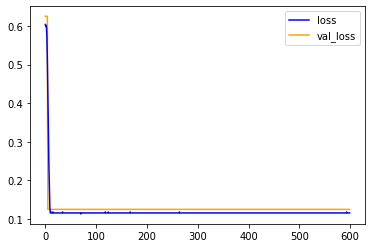

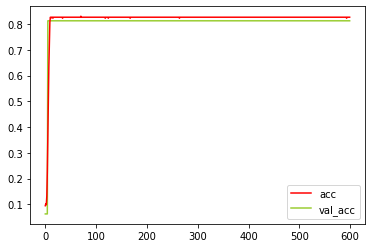

In [0]:
#以下で損失関数のグラフを描画
val_loss,=plt.plot(history.history["val_loss"],c="orange")
loss,=plt.plot(history.history["loss"],c="blue")
plt.legend([loss,val_loss],["loss","val_loss"])
plt.show()
#accuracyをグラフ化
val_acc,=plt.plot(history.history["val_acc"],c="yellowgreen")
acc,=plt.plot(history.history["acc"],c="red")
plt.legend([acc,val_acc],["acc","val_acc"])
plt.show()